In [1]:
import pandas as pd
import feature_generation as fg
import utils as u
import numpy as np

In [2]:
btc = pd.read_csv('C:/Users/gobel/code/research_env/data/Bitfinex_BTCUSD_1h.csv', index_col='Date', parse_dates=True)
btc = btc.iloc[::-1]
btc = btc.reset_index()
btc.Date = pd.to_datetime(btc.Date, format='%Y-%m-%d %I-%p')
btc = btc.set_index('Date')
btc = btc.drop(['Symbol', 'Volume To'], axis=1)
btc.columns = ['open', 'high', 'low', 'close', 'volume']
btc['vwap'] = u.vwap(btc)
btc['returns'] = u.returns(btc)
btc['adv20'] = u.adv(btc, 20)
btc = btc[1:]
btc.head()

,open,high,low,close,volume,vwap,returns,adv20
Date,,,,,,,,
2017-10-09 10:00:00,4585.7,4619.0,4582.0,4594.9,1333.44,4594.9,0.002006,NaN
2017-10-09 11:00:00,4594.9,4618.0,4594.9,4603.0,738.14,4603.0,0.001763,NaN
2017-10-09 12:00:00,4603.0,4610.0,4585.0,4595.5,570.88,4595.5,-0.001629,NaN
2017-10-09 13:00:00,4595.5,4621.0,4585.1,4617.2,1196.97,4617.2,0.004722,NaN
2017-10-09 14:00:00,4617.2,4672.4,4614.5,4667.0,2702.16,4667.0,0.010786,NaN


In [3]:
df = btc.copy()

In [11]:
fg.alpha026(btc)

Date
2017-10-09 10:00:00         NaN
2017-10-09 11:00:00         NaN
2017-10-09 12:00:00         NaN
2017-10-09 13:00:00         NaN
2017-10-09 14:00:00         NaN
                         ...   
2018-11-25 14:00:00   -0.416025
2018-11-25 15:00:00   -0.747265
2018-11-25 16:00:00   -0.747265
2018-11-25 17:00:00   -0.747265
2018-11-25 18:00:00   -0.176471
Length: 9897, dtype: float64

<AxesSubplot:xlabel='Date'>

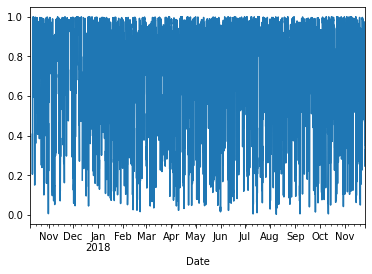

In [68]:
(temp3**temp2).plot()

In [66]:
temp1 = u.ts_sum(((df.low * 0.352233) + (df.vwap * (1 - 0.352233))), 20)
temp2 = u.rank(u.corr(u.rank(df.vwap), u.rank(df.volume), 6))
temp3 = u.rank(u.corr(temp1, u.ts_sum(u.adv(df, 40), 20), 7))

In [52]:
u.ts_rank((df.vwap - u.ts_max(df.vwap, 15)), 21)

Date
2017-10-09 10:00:00         NaN
2017-10-09 11:00:00         NaN
2017-10-09 12:00:00         NaN
2017-10-09 13:00:00         NaN
2017-10-09 14:00:00         NaN
                         ...   
2018-11-25 14:00:00    0.904762
2018-11-25 15:00:00    0.857143
2018-11-25 16:00:00    0.761905
2018-11-25 17:00:00    0.714286
2018-11-25 18:00:00    0.714286
Name: vwap, Length: 9897, dtype: float64

In [30]:
pd.Series(np.where(temp1 < temp2, temp1 * -1, temp2 * -1), index=df.index)

Date
2017-10-09 10:00:00         NaN
2017-10-09 11:00:00         NaN
2017-10-09 12:00:00         NaN
2017-10-09 13:00:00         NaN
2017-10-09 14:00:00         NaN
                         ...   
2018-11-25 14:00:00   -0.135256
2018-11-25 15:00:00   -0.127102
2018-11-25 16:00:00   -0.106615
2018-11-25 17:00:00   -0.041790
2018-11-25 18:00:00   -0.028947
Length: 9897, dtype: float64

<AxesSubplot:xlabel='Date'>

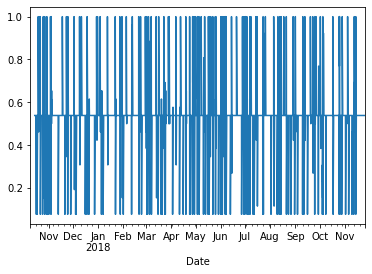

In [37]:
u.ts_rank(u.decay_linear(u.ts_argmax(u.corr(u.ts_rank(df.close, 7), u.ts_rank(u.adv(df, 60), 4), 4), 13), 14.0365), 13)

In [42]:
pd.Series(np.where(temp1 < temp2, temp1, temp2), index=df.index)

Date
2017-10-09 10:00:00         NaN
2017-10-09 11:00:00         NaN
2017-10-09 12:00:00         NaN
2017-10-09 13:00:00         NaN
2017-10-09 14:00:00         NaN
                         ...   
2018-11-25 14:00:00    0.333333
2018-11-25 15:00:00    0.333333
2018-11-25 16:00:00    0.333333
2018-11-25 17:00:00    0.389209
2018-11-25 18:00:00    0.391836
Length: 9897, dtype: float64

In [15]:
temp1 = u.rank(u.delay(((df.high - df.low) / (u.ts_sum(df.close, 5) / 5)), 2)) * u.rank(u.rank(df.volume))
temp2 = (((df.high - df.low) / (u.ts_sum(df.close, 5) / 5)) / (df.vwap - df.close))

In [8]:
temp

Date
2017-10-09 10:00:00         NaN
2017-10-09 11:00:00         NaN
2017-10-09 12:00:00         NaN
2017-10-09 13:00:00         NaN
2017-10-09 14:00:00         NaN
                         ...   
2018-11-25 14:00:00    0.324377
2018-11-25 15:00:00    0.380800
2018-11-25 16:00:00    0.429782
2018-11-25 17:00:00    0.478247
2018-11-25 18:00:00    0.469360
Length: 9897, dtype: float64

In [186]:
u.rank(u.corr(u.rank(df.vwap), u.rank(df.volume), 6))

Date
2017-10-09 10:00:00         NaN
2017-10-09 11:00:00         NaN
2017-10-09 12:00:00         NaN
2017-10-09 13:00:00         NaN
2017-10-09 14:00:00         NaN
                         ...   
2018-11-25 14:00:00    0.386838
2018-11-25 15:00:00    0.214932
2018-11-25 16:00:00    0.331808
2018-11-25 17:00:00    0.666463
2018-11-25 18:00:00    0.782932
Length: 9897, dtype: float64

<AxesSubplot:>

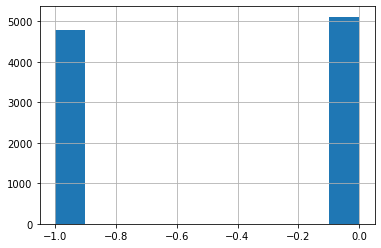

In [168]:
((temp1 < temp2) * -1).hist()

In [53]:
((rank(temp2) < rank(delta(((((high + low) / 2) * 0.178404) 
+ (vwap * (1 -0.178404))), 3.69741))) * -1) 

In [52]:
temp1 = ((-1 * u.ts_min(df.low, 5)) + u.delay(u.ts_min(df.low, 5), 5))
temp2 = u.rank(((u.ts_sum(df.returns, 240) - u.ts_sum(df.returns, 20)) / 220))

<AxesSubplot:xlabel='Date'>

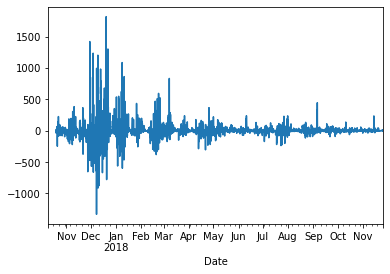

In [18]:
((temp1 * temp2) * u.ts_rank(df.volume, 5)).plot()

In [29]:
df = df.dropna()